Ali Ahmet TAŞKESEN - 18050111022

**Import requirements**

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random
import time

**Load dataset**

In [104]:
iris = load_iris()

**Assign data part and target part**

In [105]:
X = iris.data
y = iris.target

**Split the data**

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

**Define get distance function for finding distance between points**

In [107]:
def get_distance(point, data):
	return np.sqrt(np.sum((point - data)**2, axis=1))

**Define most_common function for taking member that has most count from  an array**

In [108]:
def most_common(lst):
  return max(set(lst), key=lst.count)

**Create new_Xtest and new_Ytest for evaluate the model according to test_ratio and n_neighbors**

In [109]:
new_Xtest = np.zeros(0)
new_Ytest = np.zeros(0)

**Define fitAndPredict as mentioned in homework, create new test domains according to test_ratio, take most commen n_neighbors from sorted distances array**

In [110]:
def fitAndPredict(X_train, y_train, X_test, n_neighbors, test_ratio):
	global  new_Xtest, new_Ytest
	
	new_len = int(len(X_test) * test_ratio)
	new_Xtest = np.zeros(shape=[new_len, 4])
	new_Ytest = np.zeros(new_len)

	rand_indices = random.sample(range(len(X_test)), new_len)

	k=0
	for i in rand_indices:
		new_Xtest[k] = X_test[i]
		new_Ytest[k] = y_test[i]
		k+=1

	neighbors = []
	for x in new_Xtest:
			distances = get_distance(x, X_train)
			y_sorted = [y for _, y in sorted(zip(distances, y_train))]
			neighbors.append(y_sorted[:n_neighbors])
	 
	return list(map(most_common, neighbors))


**Evaluate the model according to n that number of neighbors. Also test_ratio = 1 for all cases.**

**Then we can say after the 3 neighbors we reach almost perfect results**

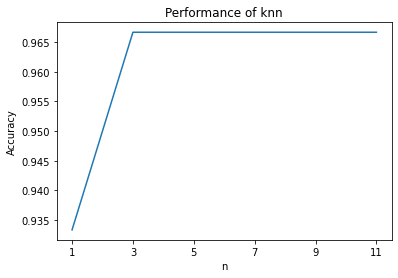

In [111]:
accuracies = []
computation_times = []

n_domein = np.arange(1, 12, 2)
for n in n_domein:
	start = time.time()
	y_pred = fitAndPredict(X_train, y_train, X_test, n_neighbors=n, test_ratio=1)
	computation_times.append((time.time()-start) * 10**3)
	accuracy = sum(y_pred == new_Ytest) / len(new_Ytest)
	accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(n_domein, accuracies)

x_ticks = [1, 3, 5, 7, 9, 11]
x_labels = [1, 3, 5, 7, 9, 11]
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set(xlabel="n",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

**Evaluate the correlation between to Computation Time and different number of neighbors**

**We can say for the 11 neighbors has highest Computation Time**

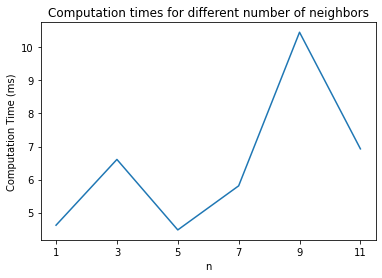

In [112]:
fig, ax = plt.subplots()
ax.plot(n_domein, computation_times)

x_ticks = [1, 3, 5, 7, 9, 11]
x_labels = x_ticks
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set(xlabel="n",
       ylabel="Computation Time (ms)",
       title="Computation times for different number of neighbors")
plt.show()

**Evaluate the model according to k that test_ratio. Also number of neighbors = 5 for all cases**

**According to my research commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing. Other ratios such as 70:30, 60:40, and even 50:50 are also used in practice. There does not seem to be clear guidance on what ratio is best or optimal for a given dataset.**

**For this homework as we see below table, 0.35 and 0.45 test ratios are lowest, up to 0.3 values are perfect, external of above values almost perfect**

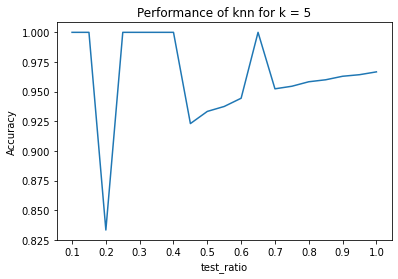

In [113]:
accuracies = []

k_domein = np.arange(0.1, 1.01, 0.05)
for k in k_domein:
	y_pred = fitAndPredict(X_train, y_train, X_test, n_neighbors=5, test_ratio=k)
	accuracy = sum(y_pred == new_Ytest) / len(new_Ytest)
	accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(k_domein, accuracies)

x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
x_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set(xlabel="test_ratio",
       ylabel="Accuracy",
       title="Performance of knn for k = 5")
plt.show()